In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

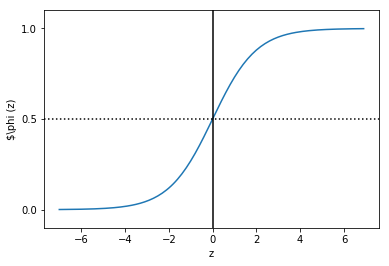

In [2]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.axhspan(0.0, 1.0, facecolor = '1.0', alpha = 1.0, ls = 'dotted')
plt.axhline(y = 0.5, ls = 'dotted', color = 'k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)')
plt.show()

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y= iris.target
#df = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_region(x, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.04, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y==cl, 1], alpha = 0.8, cmap = cmap(idx), marker = markers[idx], label = cl)

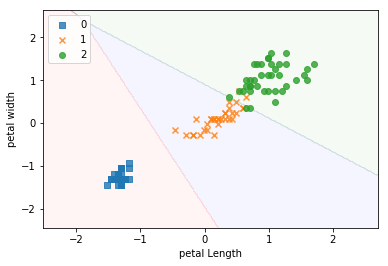

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000, random_state = 0)
lr.fit(x_train_std, y_train)

plot_decision_region(x_train_std, y_train, classifier = lr)
plt.xlabel('petal Length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(x_test_std)
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [11]:
lr.predict_proba(x_test_std[0:2])

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01],
       [6.08753106e-04, 9.99285569e-01, 1.05678028e-04]])

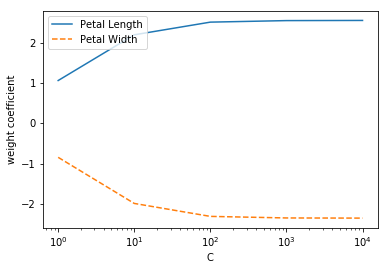

In [16]:
weights, params = [], []
for c in np.arange(0, 5):
    lr = LogisticRegression(C = 10**c, random_state=0)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
plt.plot(params, weights[:,0], label = 'Petal Length')
plt.plot(params, weights[:,1], label = 'Petal Width', linestyle = '--')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()